In [20]:
import numpy as np
import matplotlib.pyplot as plt
print("setup complete")

setup complete


In [2]:
a = np.array([7, 1, 5, 2, 3])

In [6]:
%timeit np.sort(a)

2.81 µs ± 79 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
a = np.array([7, 1, 5, 2, 3])

In [7]:
%timeit a.sort()

479 ns ± 8.54 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
a = np.array([7, 1, 5, 2, 3])

In [9]:
ind = np.argsort(a)
ind

array([1, 3, 4, 2, 0], dtype=int64)

In [10]:
a[ind]

array([1, 2, 3, 5, 7])

In [11]:
rand = np.random.RandomState()
Mat = rand.randint(1, 9, (3,4))

In [12]:
Mat

array([[7, 5, 1, 6],
       [4, 2, 6, 3],
       [7, 5, 5, 5]])

In [13]:
np.sort(Mat, axis=0)

array([[4, 2, 1, 3],
       [7, 5, 5, 5],
       [7, 5, 6, 6]])

In [14]:
np.sort(Mat, axis=1)

array([[1, 5, 6, 7],
       [2, 3, 4, 6],
       [5, 5, 5, 7]])

In [15]:
np.sort(np.sort(Mat, axis=0), axis=1)

array([[1, 2, 3, 4],
       [5, 5, 5, 7],
       [5, 6, 6, 7]])

In [16]:
a = np.array([7, 1, 5, 2, 3])

In [17]:
np.partition(a, 3)

array([2, 3, 1, 5, 7])

In [19]:
# K nn
Mat1 = rand.randint(1,20,30).reshape(15,2)
Mat1

array([[16, 19],
       [ 4,  7],
       [ 7, 14],
       [10, 19],
       [ 4,  5],
       [18,  1],
       [10,  8],
       [17, 18],
       [ 6,  9],
       [19,  8],
       [ 7, 17],
       [ 1, 14],
       [ 6, 13],
       [13, 10],
       [15,  8]])

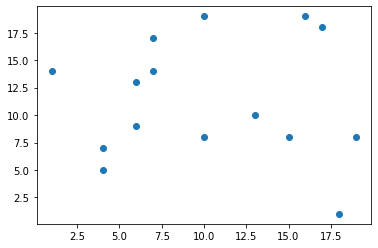

In [21]:
plt.scatter(Mat1[:,0],Mat1[:,1])

In [22]:
# distance entre chaque paire de points
Mat_dist = np.sum((Mat1[:,np.newaxis,:] - Mat1[np.newaxis,:,:])**2, axis=-1)

In [23]:
# Trier les lignes
nearest = np.argsort(Mat_dist, axis=1)

In [24]:
nearest

array([[ 0,  7,  3, 10, 13,  2, 14,  9, 12,  6,  8, 11,  1,  5,  4],
       [ 1,  4,  8,  6, 12,  2, 11, 13, 10, 14,  3,  9,  5,  0,  7],
       [ 2, 12, 10,  8,  3, 11,  6, 13,  1,  4, 14,  0,  7,  9,  5],
       [ 3, 10,  2,  0,  7, 12, 13, 11,  8,  6, 14,  1,  9,  4,  5],
       [ 4,  1,  8,  6, 12,  2, 11, 13, 14, 10,  5,  3,  9,  7,  0],
       [ 5,  9, 14, 13,  6,  8,  4,  1, 12,  2,  7,  0, 10,  3, 11],
       [ 6, 13,  8, 14,  1, 12,  2,  4,  9, 10,  5, 11,  3,  7,  0],
       [ 7,  0,  3, 13, 10,  9, 14,  2, 12,  6,  8, 11,  1,  5,  4],
       [ 8,  1, 12,  6,  4,  2, 11, 13, 10, 14,  3,  9,  0,  7,  5],
       [ 9, 14, 13,  5,  6,  7,  0,  8,  2, 12,  3, 10,  1,  4, 11],
       [10,  2,  3, 12, 11,  8,  0, 13,  6,  7,  1, 14,  4,  9,  5],
       [11, 12,  2, 10,  8,  1,  4,  3,  6, 13, 14,  0,  7,  9,  5],
       [12,  2,  8, 10, 11,  1,  6,  3, 13,  4, 14,  0,  7,  9,  5],
       [13, 14,  6,  9,  8,  2, 12,  7, 10,  0,  1,  3,  4,  5, 11],
       [14, 13,  9,  6,  5,  8,  2

In [25]:
K = 3
nearest_partition = np.argpartition(Mat_dist, K + 1, axis=1)
nearest_partition

array([[ 0,  7,  3, 10, 13,  2, 14,  1,  6,  9,  5, 11, 12,  4,  8],
       [ 4,  6,  8,  1, 12,  5, 14,  3,  2,  9, 10, 11, 13,  0,  7],
       [ 2, 12, 10,  8,  3, 11,  6,  1, 14,  4, 13,  0,  9,  5,  7],
       [10,  0,  2,  3,  7,  5,  6,  1,  8,  9,  4, 11, 12, 13, 14],
       [ 4,  6,  8,  1, 12,  5, 14,  3,  2,  9, 10, 11, 13,  7,  0],
       [ 9,  5, 14, 13,  6,  8, 12,  1,  4,  7, 10, 11,  3,  2,  0],
       [ 6, 13,  8, 14,  1, 12,  5,  3,  4,  9, 10, 11,  2,  7,  0],
       [ 7,  0,  3, 13, 10, 14,  9,  2,  1,  6,  5, 11, 12,  4,  8],
       [ 8,  1, 12,  6,  4,  2, 13, 14,  3,  9, 10, 11,  0,  5,  7],
       [ 9, 13, 14,  5,  6,  7,  4,  1,  8,  3, 10, 11, 12,  2,  0],
       [ 3,  2, 10, 12, 11,  8,  6,  0, 13,  7,  9,  1,  5,  4, 14],
       [12, 11,  2, 10,  8,  1,  4, 14,  6,  3, 13,  0,  9,  5,  7],
       [ 8, 10,  2, 12, 11, 14,  6,  1,  4,  3, 13,  0,  9,  5,  7],
       [14, 13,  6,  9,  8,  2, 12,  7,  1,  5, 10, 11,  4,  3,  0],
       [14, 13,  9,  6,  5,  8,  2